In [1]:
# importing libaries ----
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

In [2]:
#Load other modules
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.model_selection import train_test_split
#To show graphs within the notebook
%matplotlib inline 

In [3]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [4]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [5]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

#Check the frequency of each number
df_y.value_counts().sort_index()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [6]:
df_images = [X_train,X_test]
df_labels = [y_train,y_test]

result_images = pd.concat(df_images,ignore_index=True)
result_labels = pd.concat(df_labels,ignore_index=True)


In [7]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, contamination = 0.05)
clf.fit(result_images)


IsolationForest(contamination=0.05, max_samples=100)

In [8]:
# predictions on all data
y_pred_all = clf.predict(result_images)

In [9]:
# new, 'normal' observations
print("Accuracy:", list(y_pred_all).count(1)/y_pred_all.shape[0])

Accuracy: 0.95


In [10]:
print(y_pred_all)

[1 1 1 ... 1 1 1]


In [11]:
y_pred_outliers_index = [i for i in range(len(y_pred_all)) if y_pred_all[i]==-1]

In [12]:
df_images_outliers = result_images.copy()

In [13]:
df_images_outliers = df_images_outliers.iloc[y_pred_outliers_index,:]


In [14]:
df_labels_outliers = result_labels.copy()
df_labels_outliers = df_labels_outliers.iloc[y_pred_outliers_index]

In [15]:
y_pred_outliers = clf.predict(df_images_outliers)

In [16]:
pca_data=result_images

from sklearn.preprocessing import StandardScaler
std_data= StandardScaler().fit_transform(pca_data.astype(float))
print(std_data.shape)

(42000, 784)


In [17]:
# finding the covariance matrix : S = (1/n)* A.T*A
cov_mat=(np.matmul(std_data.T, std_data))/std_data.shape[0]
print('The shape of covariance matrix is ',cov_mat.shape)


The shape of covariance matrix is  (784, 784)


In [18]:
#finding the top two eigen values and corrsponding eigen vectors
from scipy.linalg import eigh


# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors= eigh(cov_mat, eigvals=(782,783))

print('Shape of the vectors', vectors.shape)

#since vector[0] is 2nd principal and vectors[1] is 1st principal ,therefore we need to reverse the vectors and 
# take there traspose
vectors= vectors.T
vectors=vectors[::-1]
print('updated shape of the vectors', vectors.shape)

Shape of the vectors (784, 2)
updated shape of the vectors (2, 784)


In [19]:
#projecting the original data on the new plane formed by the two eigen vectors
new_coordinates= np.matmul(vectors,std_data.T)
print('(2,784) * (784,42000)  = (2,42000)' )
print(new_coordinates.shape)

(2,784) * (784,42000)  = (2,42000)
(2, 42000)


In [20]:
new_coordinates=np.vstack((new_coordinates,result_labels)).T
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st principal", "2nd principal", "label"))
print(dataframe.head())

   1st principal  2nd principal  label
0       7.138767       2.562175    6.0
1      11.113698       2.207243    6.0
2      -2.257208       7.214693    4.0
3       0.222691       3.153018    4.0
4       3.801751      -6.157355    2.0


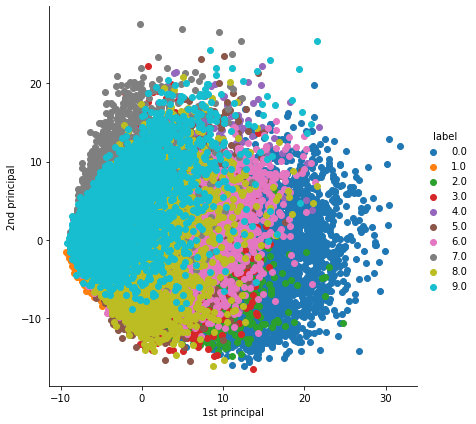

In [21]:
#plotting the points in the nw coordinate system
sns.FacetGrid(dataframe, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

In [22]:
pca_data2=df_images_outliers

from sklearn.preprocessing import StandardScaler
std_data2= StandardScaler().fit_transform(pca_data2.astype(float))
print(std_data2.shape)

(2100, 784)


In [23]:
# finding the covariance matrix : S = (1/n)* A.T*A
cov_mat2=(np.matmul(std_data2.T, std_data2))/std_data2.shape[0]
print('The shape of covariance matrix is ',cov_mat2.shape)

The shape of covariance matrix is  (784, 784)


In [24]:
#finding the top two eigen values and corrsponding eigen vectors

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values2, vectors2= eigh(cov_mat2, eigvals=(782,783))

print('Shape of the vectors', vectors2.shape)

#since vector[0] is 2nd principal and vectors[1] is 1st principal ,therefore we need to reverse the vectors and 
# take there traspose
vectors2= vectors2.T
vectors2=vectors2[::-1]
print('updated shape of the vectors', vectors2.shape)

Shape of the vectors (784, 2)
updated shape of the vectors (2, 784)


In [25]:
#projecting the original data on the new plane formed by the two eigen vectors
new_coordinates2= np.matmul(vectors2,std_data2.T)
print('(2,784) * (784,42000)  = (2,42000)' )
print(new_coordinates2.shape)

(2,784) * (784,42000)  = (2,42000)
(2, 2100)


In [26]:
new_coordinates2=np.vstack((new_coordinates2,df_labels_outliers)).T
# creating a new data frame for ploting the labeled points.
dataframe2 = pd.DataFrame(data=new_coordinates2, columns=("1st principal", "2nd principal", "label"))
print(dataframe2.head())

   1st principal  2nd principal  label
0      11.841250       7.052954    3.0
1      10.268779      -1.214490    3.0
2       6.480381      -8.066559    4.0
3      -1.965806       6.938534    0.0
4       6.197874      -6.235249    2.0


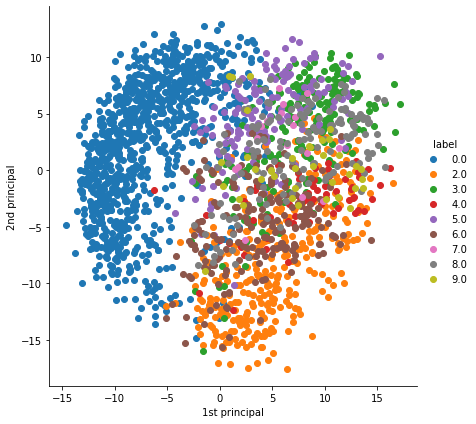

In [27]:
#plotting the points in the nw coordinate system
sns.FacetGrid(dataframe2, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

In [28]:
#labeling the outliers in the dataftame
pca_data3=result_images

std_data3= StandardScaler().fit_transform(pca_data3.astype(float))
print(std_data3.shape)


(42000, 784)


In [29]:
# finding the covariance matrix : S = (1/n)* A.T*A
cov_mat3=(np.matmul(std_data3.T, std_data3))/std_data3.shape[0]
print('The shape of covariance matrix is ',cov_mat3.shape)


The shape of covariance matrix is  (784, 784)


In [30]:
# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values3, vectors3= eigh(cov_mat3, eigvals=(782,783))

print('Shape of the vectors', vectors3.shape)

#since vector[0] is 2nd principal and vectors[1] is 1st principal ,therefore we need to reverse the vectors and 
# take there traspose
vectors3= vectors3.T
vectors3=vectors3[::-1]
print('updated shape of the vectors', vectors3.shape)

Shape of the vectors (784, 2)
updated shape of the vectors (2, 784)


In [31]:
#projecting the original data on the new plane formed by the two eigen vectors
new_coordinates3= np.matmul(vectors3,std_data3.T)
print('(2,784) * (784,42000)  = (2,42000)' )
print(new_coordinates3.shape)

(2,784) * (784,42000)  = (2,42000)
(2, 42000)


In [32]:
result_labels_out = result_labels
for i in range(len(y_pred_outliers_index)):
    result_labels_out[y_pred_outliers_index[i]] = '-1'

In [33]:
new_coordinates3=np.vstack((new_coordinates3,result_labels_out)).T
# creating a new data frame for ploting the labeled points.
dataframe3 = pd.DataFrame(data=new_coordinates3, columns=("1st principal", "2nd principal", "label"))
print(dataframe3.head())

   1st principal  2nd principal  label
0       7.138767       2.562175    6.0
1      11.113698       2.207243    6.0
2      -2.257208       7.214693    4.0
3       0.222691       3.153018    4.0
4       3.801751      -6.157355    2.0


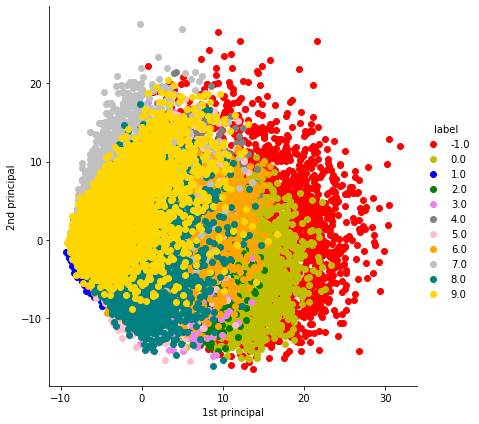

In [34]:
#plotting the points in the nw coordinate system
d = {'color': ['r','y','blue','green','violet','gray','pink','orange','silver','teal','gold']}
sns.FacetGrid(dataframe3, hue_kws=d, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

In [71]:
result_labels_clust = result_labels
for i in range(len(y_pred_outliers_index)):
    result_labels_clust[y_pred_outliers_index[i]] = 0
for i in range(len(result_labels_clust)):
    if result_labels_clust[i]!=0:
        result_labels_clust[i] = 1

In [72]:
result_images.insert(0,'label',result_labels_clust,True)

In [65]:
def clusteredness(df):
    df0 = df[df.label == 0]
    df1 = df[df.label == 1]
    df0 = df0.drop('label',axis='columns')
    df1 = df1.drop('label',axis='columns')

    df0_var = df0.var(1)
    df0_var = df0_var.var(0)
    df1_var = df1.var(1)
    df1_var = df1_var.var(0)

    return df1_var / df0_var

In [66]:
clusterness = clusteredness(result_images)
clusterness

0.9213780504732859